In [3]:
import numpy as np
import re

# When data is given as a text file
file_path = 'CBOW.txt'

with open(file_path,'r') as file :
    file_contents = file.read()

data = file_contents

# data = """Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."""
# data = """Natural language processing (NLP) is a subfield of artificial intelligence (AI) focused on the interaction between computers and human language. The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful. NLP applications include speech recognition, machine translation, sentiment analysis, and chatbot development. Researchers in NLP use techniques such as tokenization, part-of-speech tagging, named entity recognition, and syntactic parsing to analyze and process text data."""


# Split and clean sentences
sentences = data.split('.')
clean_sent = [re.sub(r'(?:^| )\w (?:$| )', ' ', re.sub('[^A-Za-z0-9]+', ' ', sentence)).strip().lower() for sentence in sentences if sentence]

clean_sent

['natural language processing nlp is a subfield of artificial intelligence ai focused on the interaction between computers and human language the goal of nlp is to enable computers to understand interpret and generate human language in a way that is both meaningful and useful nlp applications include speech recognition machine translation sentiment analysis and chatbot development researchers in nlp use techniques such as tokenization part of speech tagging named entity recognition and syntactic parsing to analyze and process text data']

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)

# Mappings for word and index lookup
index_to_word = {i: word for i, word in enumerate(tokenizer.index_word.values(), start=1)}
word_to_index = tokenizer.word_index

# Prepare context-target pairs
vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2

contexts = []
targets = []
for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
        contexts.append(context)
        targets.append(target)

contexts[:5], targets[:5]

([[14, 3, 2, 4], [3, 15, 4, 7], [15, 2, 7, 16], [2, 4, 16, 5], [4, 7, 5, 17]],
 [15, 2, 4, 7, 16])

In [5]:
for i in range(5):
    context_words = [index_to_word[idx] for idx in contexts[i]]
    target_word = index_to_word[targets[i]]
    print(f"Context: {context_words} -> Target: {target_word}")

Context: ['natural', 'language', 'nlp', 'is'] -> Target: processing
Context: ['language', 'processing', 'is', 'a'] -> Target: nlp
Context: ['processing', 'nlp', 'a', 'subfield'] -> Target: is
Context: ['nlp', 'is', 'subfield', 'of'] -> Target: a
Context: ['is', 'a', 'of', 'artificial'] -> Target: subfield


In [6]:
X = np.array(contexts)
Y = np.array(targets)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 

# Build the CBOW model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2 * context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

# Compile and train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, epochs=80)

Epoch 1/80


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0066 - loss: 4.0609   
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0746 - loss: 4.0537
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0785 - loss: 4.0465 
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0903 - loss: 4.0375
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0785 - loss: 4.0248 
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0590 - loss: 4.0143
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0942 - loss: 3.9878 
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0942 - loss: 3.9566 
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0629 - loss: 3.9343
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0942 - loss: 3.8790
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0863 - loss: 3.8663
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0785 - loss: 3.8136
Epoch 13/80
3

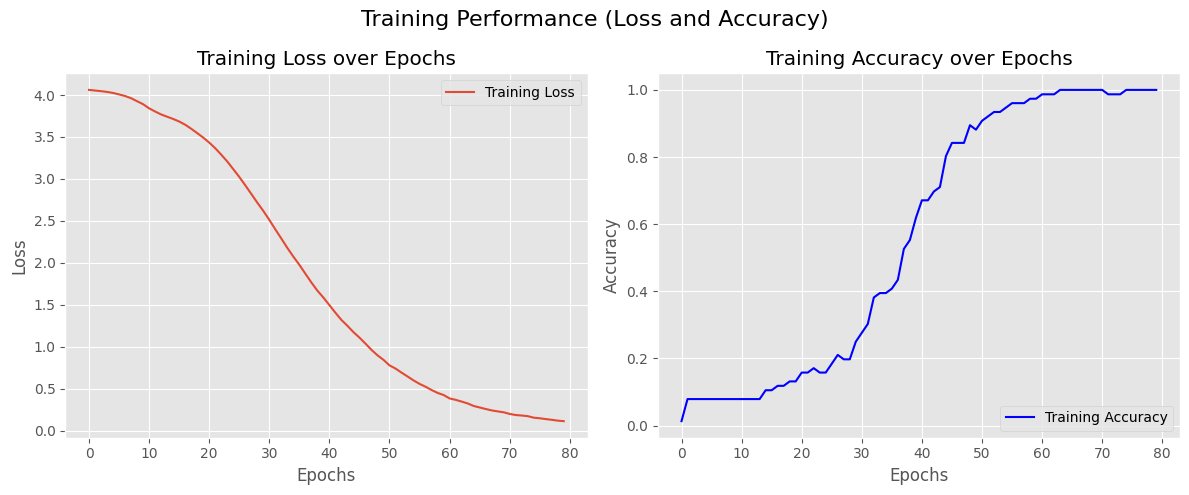

In [8]:
import matplotlib.pyplot as plt

# Plot the training loss and accuracy
plt.style.use("ggplot")  # Use ggplot style for better aesthetics
epochs_range = range(len(history.history['loss']))  # Get range based on actual epochs

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss
ax1.plot(epochs_range, history.history['loss'], label="Training Loss")
ax1.set_title("Training Loss over Epochs")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper right")

# Plot Accuracy
ax2.plot(epochs_range, history.history['accuracy'], label="Training Accuracy", color="blue")
ax2.set_title("Training Accuracy over Epochs")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower right")

plt.suptitle("Training Performance (Loss and Accuracy)", fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
# test_sentences = [
#     "known as structured learning",
#     "transformers have applied to",
#     "where they produced results",
#     "cases surpassing expert performance"
# ]

test_sentences = [
    "language processing subfield artificial",  # should predict "intelligence"
    "goal NLP enable computers",  # should predict "to"
    "sentiment analysis chatbot development",  # should predict "and"
    "techniques named entity recognition"  # should predict "such"
]

for sent in test_sentences:
    words = sent.split()
    x_test = np.array([[word_to_index[word] for word in words if word in word_to_index]])
    prediction = model.predict(x_test)
    predicted_word = index_to_word[np.argmax(prediction)]
    print(f"Input: {words} -> Predicted word: {predicted_word}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Input: ['language', 'processing', 'subfield', 'artificial'] -> Predicted word: is
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Input: ['goal', 'NLP', 'enable', 'computers'] -> Predicted word: to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Input: ['sentiment', 'analysis', 'chatbot', 'development'] -> Predicted word: and
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Input: ['techniques', 'named', 'entity', 'recognition'] -> Predicted word: recognition
